# abre o dataset - domicilios com banheiro

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
caminho_arquivo = 'data/tabela6734.csv' # -tratado-01
X_full6734 = pd.read_csv(caminho_arquivo,quotechar='"', sep=';',skiprows = 4, index_col='Cod.') #  , index_col='ID' quotechar='"'  ,skiprows = 6 , skipfooter=23
X_full6734

,Unidade da Federação,Total
Cod.,,
11,Rondônia,1836
12,Acre,796
13,Amazonas,3738
14,Roraima,604
15,Pará,7880
16,Amapá,883
17,Tocantins,1599
21,Maranhão,6282
22,Piauí,3014


# plota - domicilios com banheiro

<BarContainer object of 27 artists>

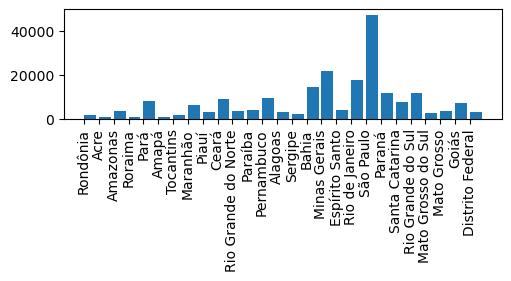

In [3]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
plt.xticks(rotation=90)

X_full6734_categorias = X_full6734['Unidade da Federação']
X_full6734_valores = X_full6734['Total']

ax.bar(X_full6734_categorias, X_full6734_valores, align='edge')

# limpa X - domicilios com banheiro

In [4]:
X_full6734=X_full6734.drop(labels='Unidade da Federação' ,axis=1)
#X_full6734=X_full6734['Total']
X_full6734.head()

#X_full.size
#X_full.info()
#3qtdeS = X_full['Total']
#3soma=qtdeS.sum()
#qtdeS.head()

#print('soma=', soma)
#print(qtdeS)
#soma=X_full.sum(axis=1)
#soma

,Total
Cod.,
11,1836
12,796
13,3738
14,604
15,7880


# abre o data set - domicilios com tv e acesso a serviço pago de streaming de vídeo

In [5]:
caminho_arquivo = 'data/tabela9650.csv' # -tratado-01
X_full9650 = pd.read_csv(caminho_arquivo,quotechar='"', sep=';',index_col='Cod.') # ,skiprows = 4 , index_col='ID' quotechar='"'  ,skiprows = 6 , skipfooter=23
X_full9650=X_full9650.drop(labels='Acesso a canais de televisão' ,axis=1)
#X_full9650=X_full9650.drop(labels='Unidade da Federação' ,axis=1)
X_full9650=X_full9650.drop(labels='Total' ,axis=1)
X_full9650.head()


,Unidade da Federação,Havia acesso a serviço pago de streaming de vídeo
Cod.,,
11,Rondônia,73
12,Acre,20
13,Amazonas,184
14,Roraima,16
15,Pará,292


# plota - domicilios com tv e acesso a serviço pago de streaming de vídeo

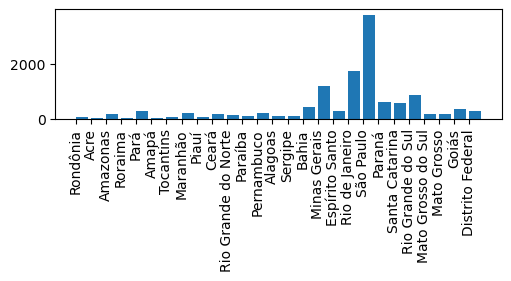

In [6]:
X_full9650_categorias = X_full9650['Unidade da Federação']
X_full9650_valores = X_full9650['Havia acesso a serviço pago de streaming de vídeo']
X_full9650_valores

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
plt.xticks(rotation=90)
ax.bar(X_full9650_categorias, X_full9650_valores, align='edge')

X_full9650=X_full9650.drop(labels='Unidade da Federação' ,axis=1)


# une os dados

In [7]:
#X_todos = X_full6734.join( X_full9650 .set_index('Cod.'), on='Cod.', lsuffix='_banheiro',rsuffix='_tv')
X_todos = X_full6734.join( X_full9650 , lsuffix='_banheiro',rsuffix='_tv')
X_todos

,Total,Havia acesso a serviço pago de streaming de vídeo
Cod.,,
11,1836,73
12,796,20
13,3738,184
14,604,16
15,7880,292
16,883,32
17,1599,50
21,6282,211
22,3014,67


# define X, y

In [8]:
X = X_todos.drop(['Havia acesso a serviço pago de streaming de vídeo'], axis=1)
#X = X_todos['Total']
y = X_todos['Havia acesso a serviço pago de streaming de vídeo']

X

,Total
Cod.,
11,1836
12,796
13,3738
14,604
15,7880
16,883
17,1599
21,6282
22,3014


In [9]:
y

Cod.
11      73
12      20
13     184
14      16
15     292
16      32
17      50
21     211
22      67
23     174
24     147
25      90
26     226
27      87
28      86
29     436
31    1213
32     276
33    1750
35    3804
41     603
42     587
43     885
50     158
51     165
52     368
53     291
Name: Havia acesso a serviço pago de streaming de vídeo, dtype: int64

# separa os dados em treinamento e teste

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=3)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 27 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   21 non-null     int64
dtypes: int64(1)
memory usage: 336.0 bytes


In [11]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 21 entries, 27 to 24
Series name: Havia acesso a serviço pago de streaming de vídeo
Non-Null Count  Dtype
--------------  -----
21 non-null     int64
dtypes: int64(1)
memory usage: 336.0 bytes


In [12]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 33 to 31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [13]:
y_val.info()

<class 'pandas.core.series.Series'>
Int64Index: 6 entries, 33 to 31
Series name: Havia acesso a serviço pago de streaming de vídeo
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


# treina o modelo

In [14]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

#modelCenso = DecisionTreeRegressor(random_state=0)
modelCenso = linear_model.LinearRegression() 
#y_train.head()
#X_train
#y_train
modelCenso.fit(X_train,y_train)
#score = modelCenso.score(X_train,y_train)


LinearRegression()

# Score sinaliza que existe uma relação linear forte

In [15]:
modelCenso.score(X_train,y_train)

0.9695838098809626

# Prevendo 

In [16]:
val_predictions = modelCenso.predict(X_val)
val_predictions

array([1283.89251009,  195.28151191,  613.17472025,  454.33968058,
       1034.30615571, 1600.34825426])

In [17]:
y_val

Cod.
33    1750
32     276
26     226
52     368
29     436
31    1213
Name: Havia acesso a serviço pago de streaming de vídeo, dtype: int64

# avaliando o modelo

In [18]:
X_todos['Havia acesso a serviço pago de streaming de vídeo'].describe()

count      27.000000
mean      455.222222
std       778.133434
min        16.000000
25%        86.500000
50%       184.000000
75%       402.000000
max      3804.000000
Name: Havia acesso a serviço pago de streaming de vídeo, dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#val_predictions_ERROR = mean_squared_error(y_val, val_predictions) # squared=False
val_predictions_ERROR = mean_absolute_error(y_val, val_predictions) # squared=False
val_predictions_ERROR

#print('y_val=', y_val)
#print('val_predictions=', val_predictions)
#print('val_predictions_ERROR=',val_predictions_ERROR)

334.33246480126417

# plotando regressão

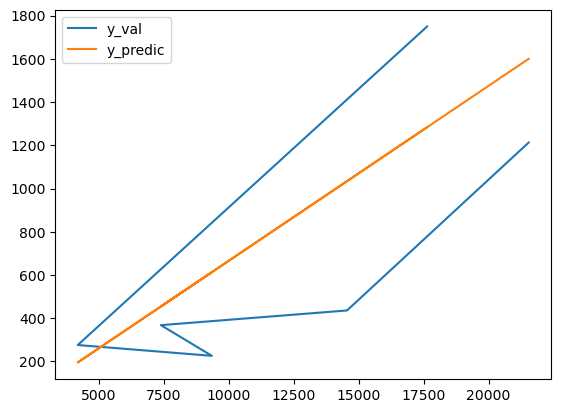

In [20]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot(X_val, y_val, label='y_val')  # Plot some data on the Axes.
ax.plot(X_val, val_predictions,label='y_predic')  # Plot some data on the Axes.
plt.legend()
plt.show()                           # Show the figure.

In [21]:
X_val, y_val

(      Total
 Cod.       
 33    17631
 32     4184
 26     9346
 52     7384
 29    14548
 31    21540,
 Cod.
 33    1750
 32     276
 26     226
 52     368
 29     436
 31    1213
 Name: Havia acesso a serviço pago de streaming de vídeo, dtype: int64)